# CUSTOMER SEGMENTATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [6]:
df = pd.read_csv("segmentation data.csv")

In [7]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [8]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


It’s always recommended to get a general sense of the dataset you’re working with, so let’s do just that with df.info():

In [10]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
df.shape

(2000, 8)

In [12]:
df.drop(['ID'], inplace = True, axis = 1)

In [13]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


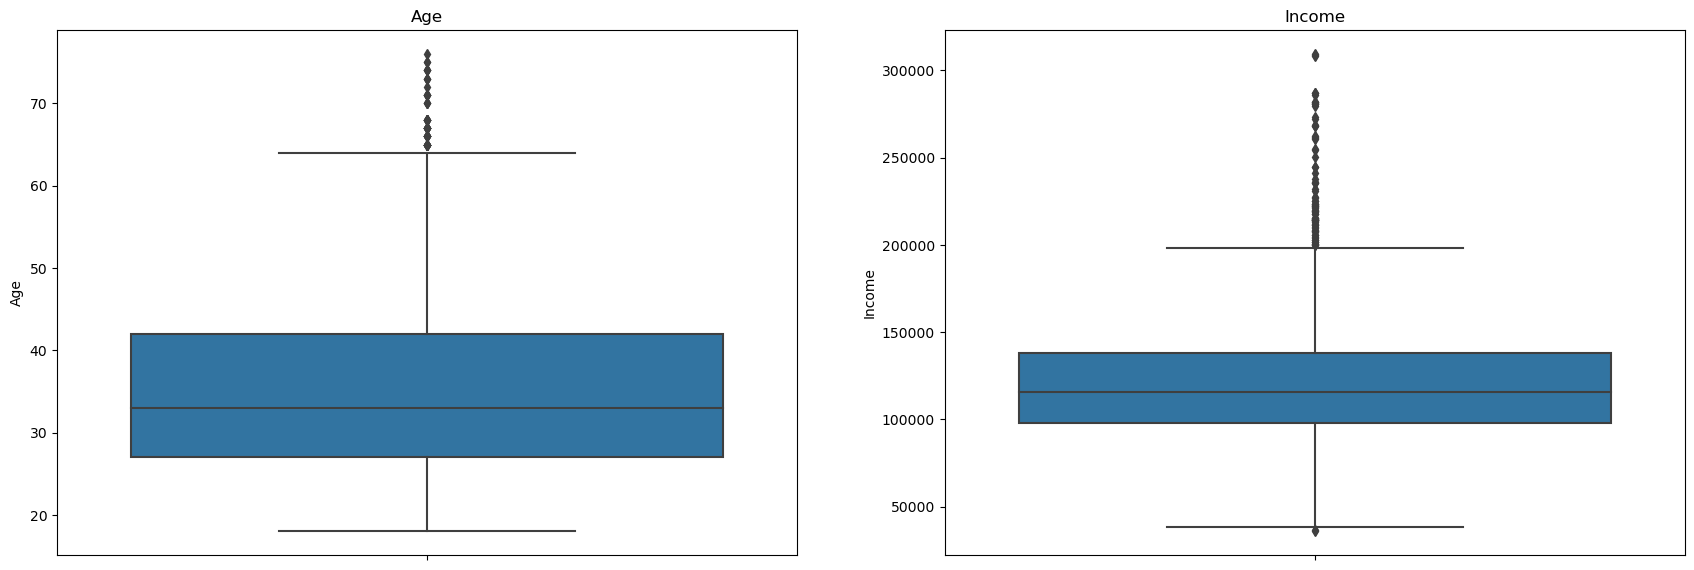

In [14]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=df.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=df.Income)
plt.title("Income")

plt.show()

In [15]:
df.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [16]:
df.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

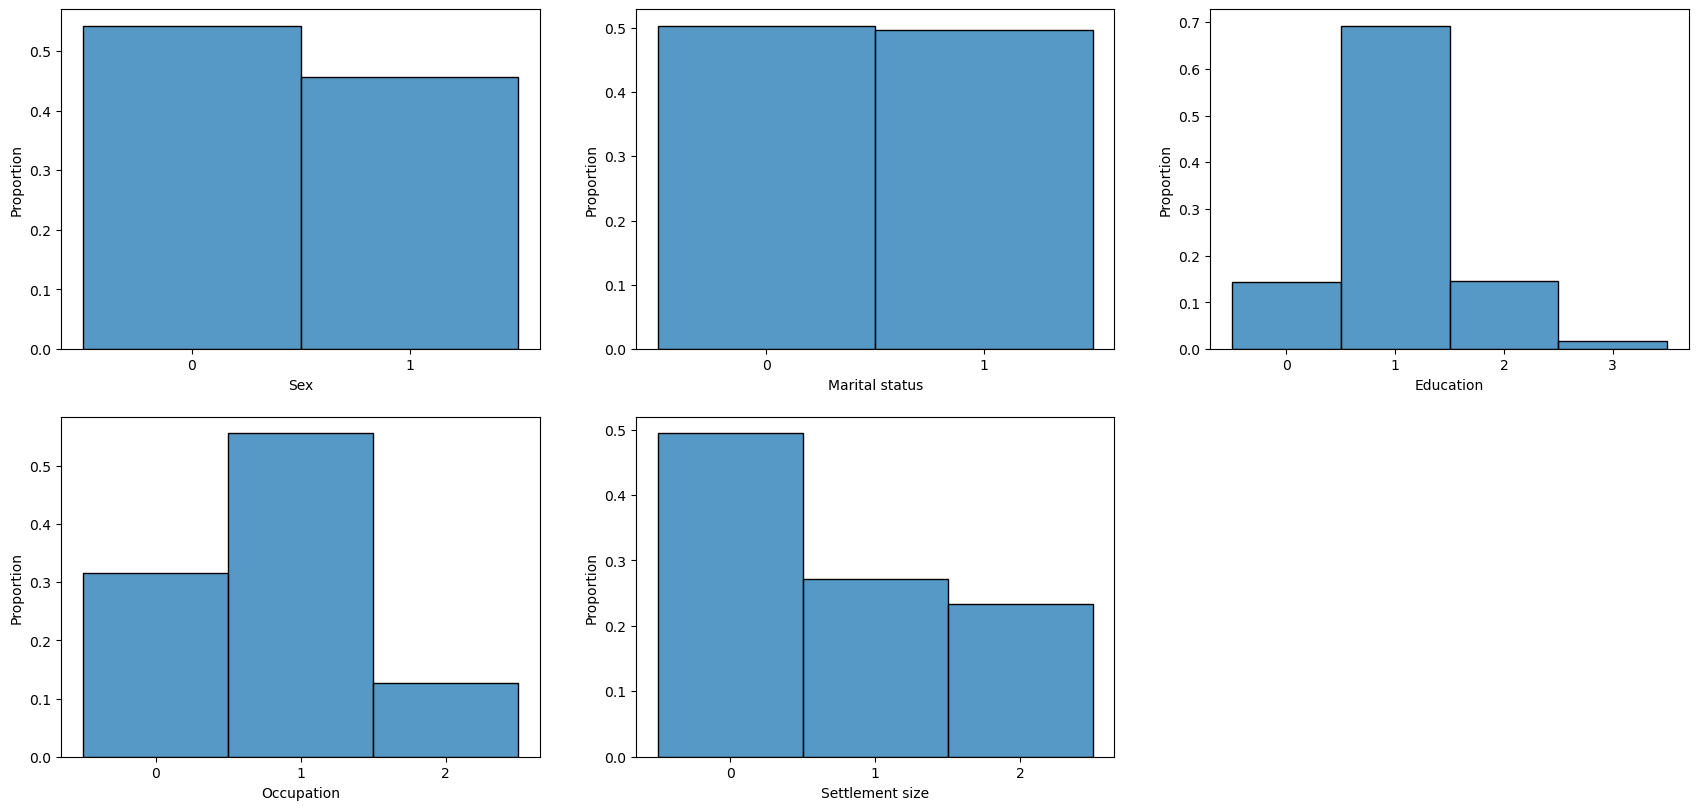

In [17]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(df.Sex.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(df['Marital status'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(df.Education.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(df.Occupation.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,1))
sns.histplot(df['Settlement size'].astype(str).sort_values(), stat='proportion')

plt.show()

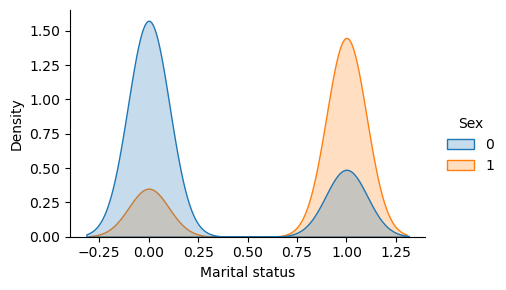

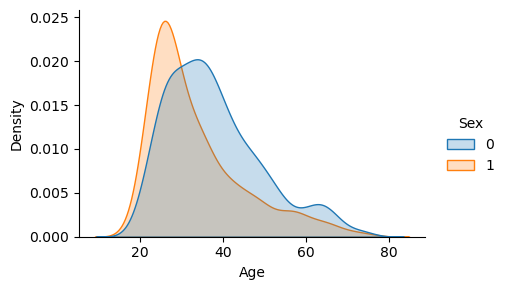

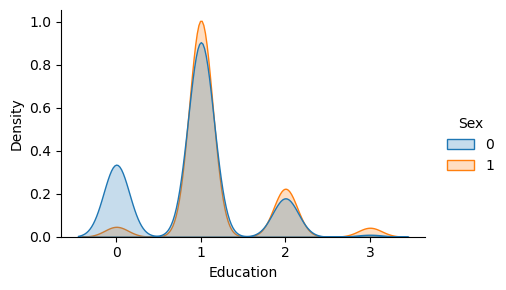

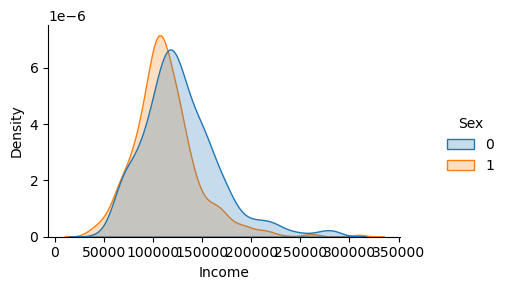

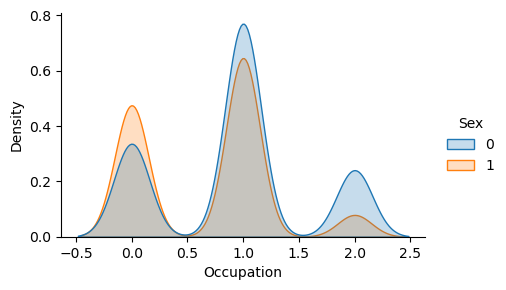

In [18]:
import warnings 

warnings.filterwarnings('ignore')


# Make the plots
sns.displot(df, x=df['Marital status'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Age'], hue="Sex", kind="kde", fill=True,  height=3, aspect=1.5)
sns.displot(df, x=df['Education'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Income'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)
sns.displot(df, x=df['Occupation'], hue="Sex", kind="kde", fill=True, height=3, aspect=1.5)

# Display the plots
plt.show()

In [19]:
col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [20]:
data=scaled[['Age','Income']]
data.head()

,Age,Income
0,2.653614,0.097524
1,-1.187132,0.782654
2,1.117316,-0.833202
3,0.775916,1.328386
4,1.458716,0.736932


In [72]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(scaled)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(10)

,wcss_score,no_of_clusters
0,14000.000000,1
1,10514.621716,2
2,8631.672548,3
3,7169.870822,4
4,6403.070166,5
5,5830.956303,6
6,5418.477333,7
7,4991.803352,8
8,4643.664952,9
9,4345.150274,10


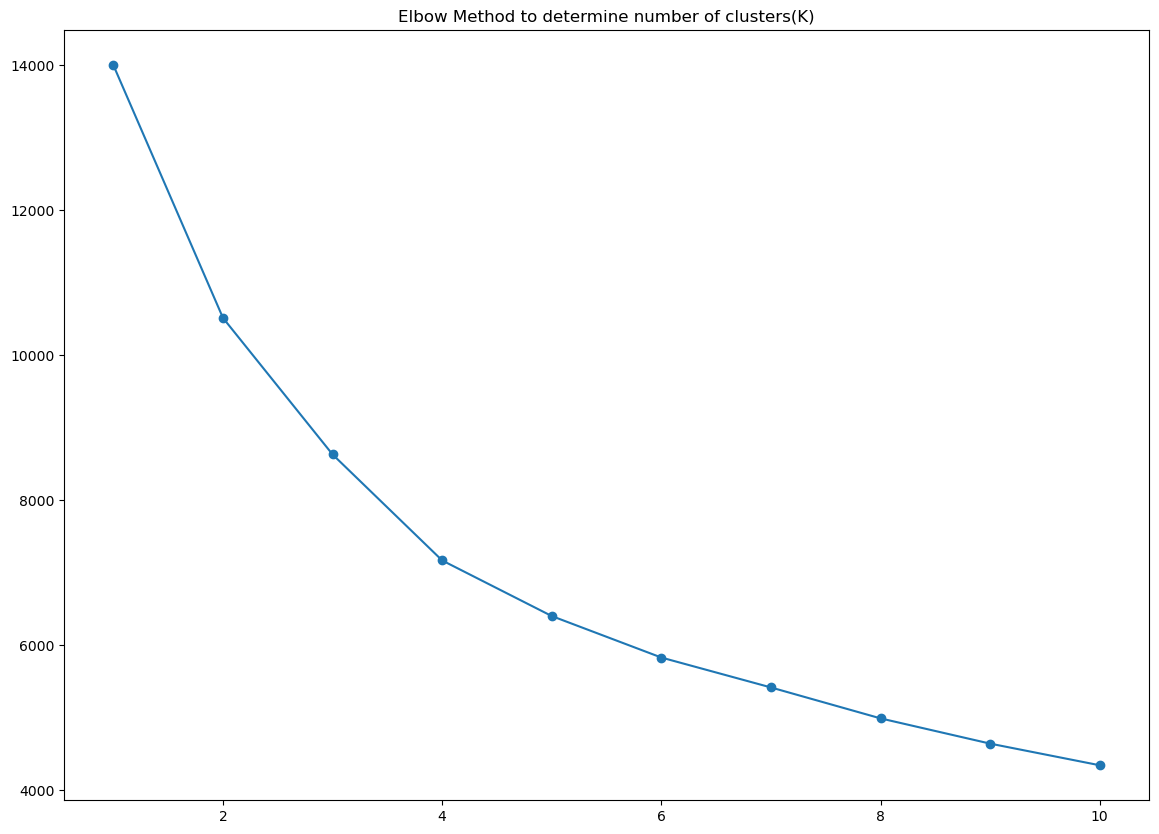

In [73]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

## K Means Clustering

In [74]:
#Algorithm

kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(scaled)

KMeans(n_clusters=3, random_state=0)

In [75]:
prediction=kmeans.fit_predict(data)
prediction



array([2, 1, 2, ..., 0, 0, 0])

In [76]:
clustered_data = scaled.copy()
clustered_data["cluster_index"] = prediction

In [77]:
clustered_data


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,2
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,2
...,...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730,2
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730,0
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730,0
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730,0


<Axes: xlabel='Age', ylabel='Income'>

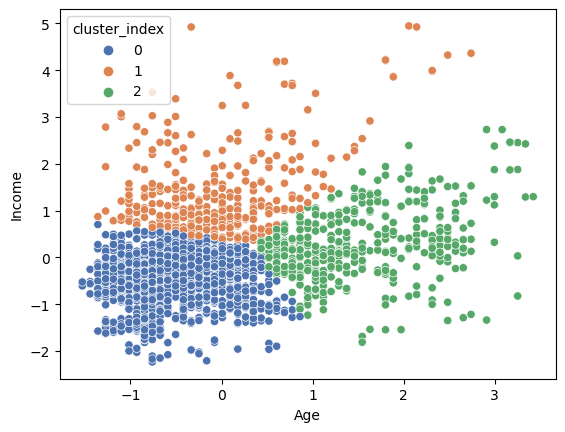

In [78]:
#lets visualise the clusters
sns.scatterplot(x=clustered_data.Age,
                y=clustered_data.Income,
                hue=clustered_data.cluster_index,
                palette="deep")

In [79]:
clustered_data.cluster_index.unique()

array([2, 1, 0])

In [80]:
score = silhouette_score(scaled, clustered_data.cluster_index, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: 0.186 ~ 0


In [81]:
agc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [82]:
agg_predict_scaled = agc.fit_predict(scaled)
score = silhouette_score(scaled, agc.labels_, random_state=0)
print(score)

0.24932369297836884


In [83]:
agg_predict_data = agc.fit_predict(data)
score = silhouette_score(data, agc.labels_, random_state=0)
print(score)

0.4473137822816456


In [51]:
agg_cluster_scaled = df.copy()
agg_cluster_scaled["cluster_index"] = agg_predict_scaled
agg_cluster_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [52]:
agg_cluster_scaled.cluster_index.unique()

array([2, 3, 0, 1], dtype=int64)

In [53]:
agg_cluster_data = df.copy()
agg_cluster_data["cluster_index"] = agg_predict_data
agg_cluster_data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_index
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,0


<Axes: xlabel='Age', ylabel='Income'>

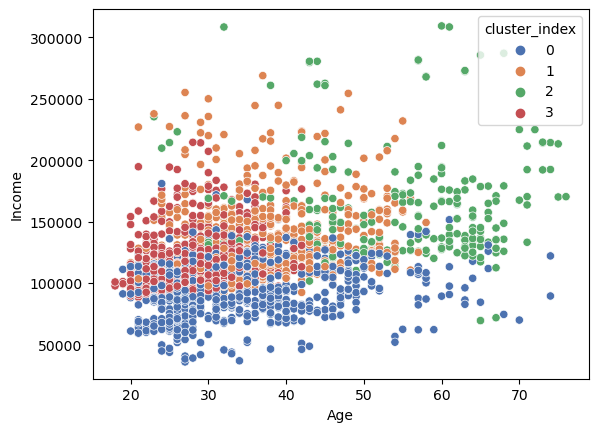

In [54]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_scaled.Age,
                y=agg_cluster_scaled.Income,
                hue=agg_cluster_scaled.cluster_index,
                palette="deep")

<Axes: xlabel='Age', ylabel='Income'>

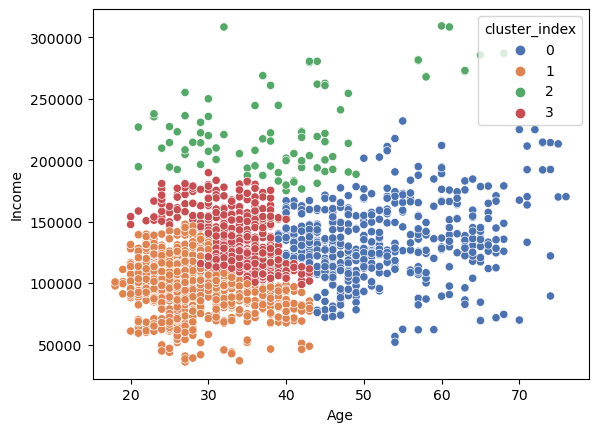

In [55]:
#lets visualise the clusters
sns.scatterplot(x=agg_cluster_data.Age,
                y=agg_cluster_data.Income,
                hue=agg_cluster_data.cluster_index,
                palette="deep")

In [56]:
agg_cluster_data.groupby('cluster_index').size()

cluster_index
0    494
1    926
2     93
3    487
dtype: int64

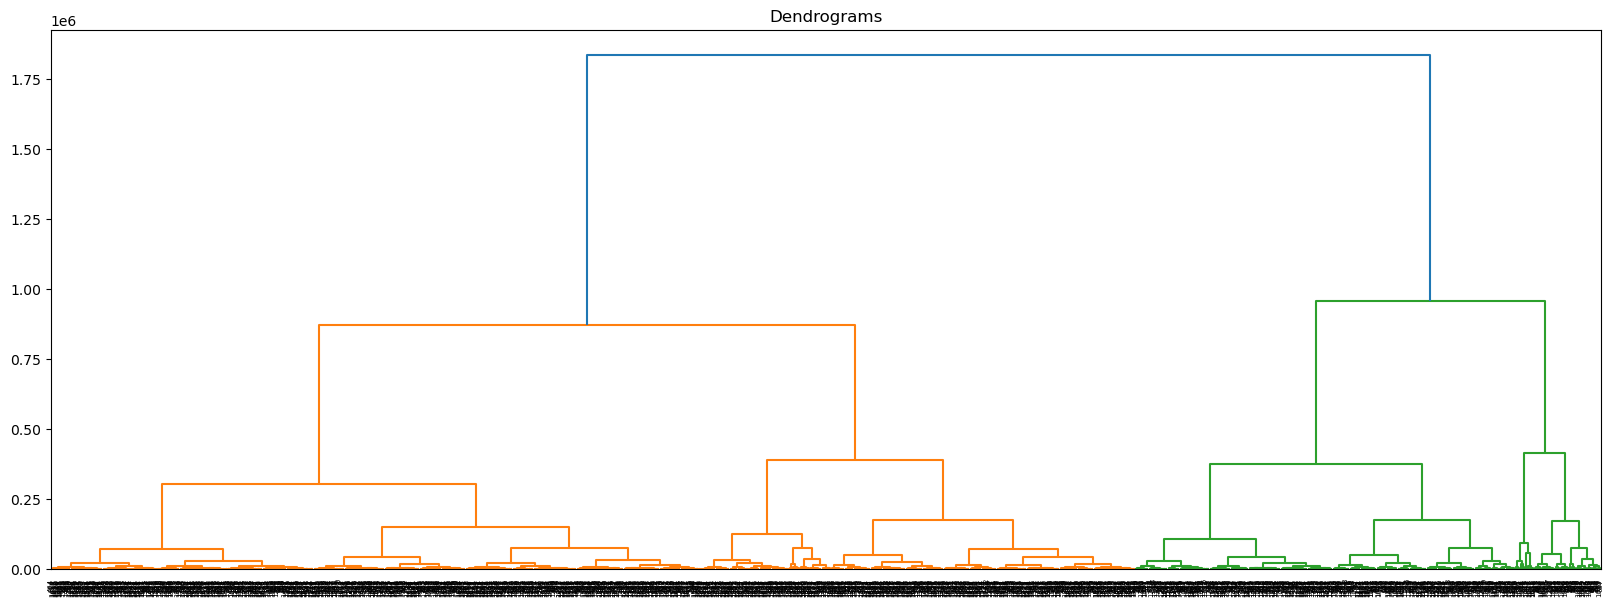

In [57]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(clustered_data, method='ward', metric='euclidean'))

In [58]:
dbs = DBSCAN(eps=2, min_samples=10)
dbs.fit_predict(scaled)
score = silhouette_score(scaled, dbs.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.179
